In [1]:
import os, nltk
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.express as px
import pandas as pd
from tqdm import tqdm

Although it is difficult (if not necessarily right) to compare perplexity across models and datasets, we can establish a fairly "solid" comparison ground starting from the fact that, both in the paper and in the proposed tutorial, the perplexity score of GPT 2 on WikiText 2, a large dataset of fairly standard text, is approximately 19.60. Remember that lower perplexity means better performance!

In [2]:
dataset_df_test = pd.read_csv("DreamBank_en_pptx_GPT2.csv")

In [3]:
dataset_df_test[["GPT2_perplexities"]].describe()

GPT2_perplexities
count       21607.000000
mean           49.553180
std           401.778635
min             4.423346
25%            25.185008
50%            32.667839
75%            45.742916
max         56966.582031

At a first glance, we notice how the average perplexity is quite high (~49.5), suggesting that, on average, dream reports might be quite unusual strings of text! Are the statistics stable for groups like gender or series (i.e., DreamBank's collections)?

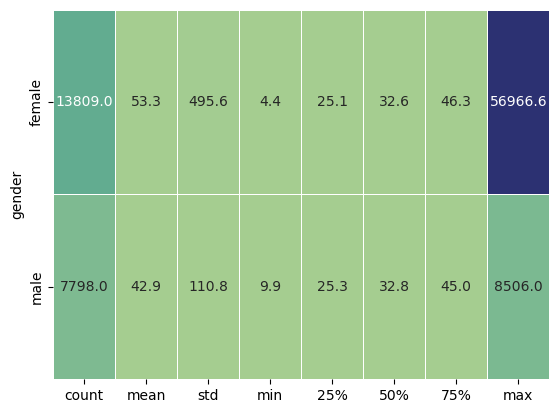

In [4]:
g = sns.heatmap(
    dataset_df_test.groupby("gender")["GPT2_perplexities"].describe(), 
    annot=True, 
    fmt=".1f",
    linewidth=.5, 
    cmap="crest", 
    cbar=False
)

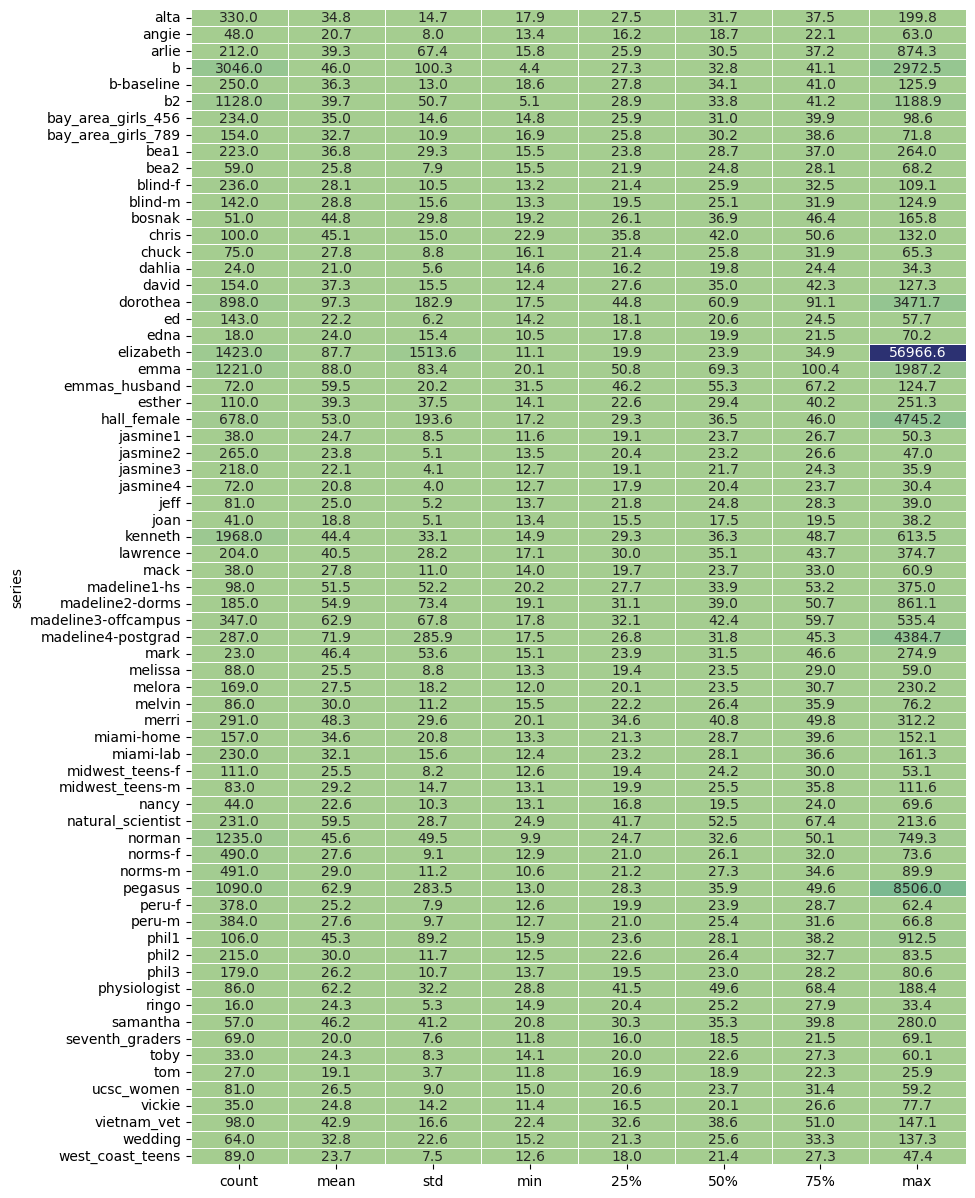

In [5]:
plt.figure(figsize=(10,15))
g = sns.heatmap(
    dataset_df_test.groupby("series")["GPT2_perplexities"].describe(), 
    annot=True, 
    fmt=".1f",
    linewidth=.5, 
    cmap="crest", 
    cbar=False
)

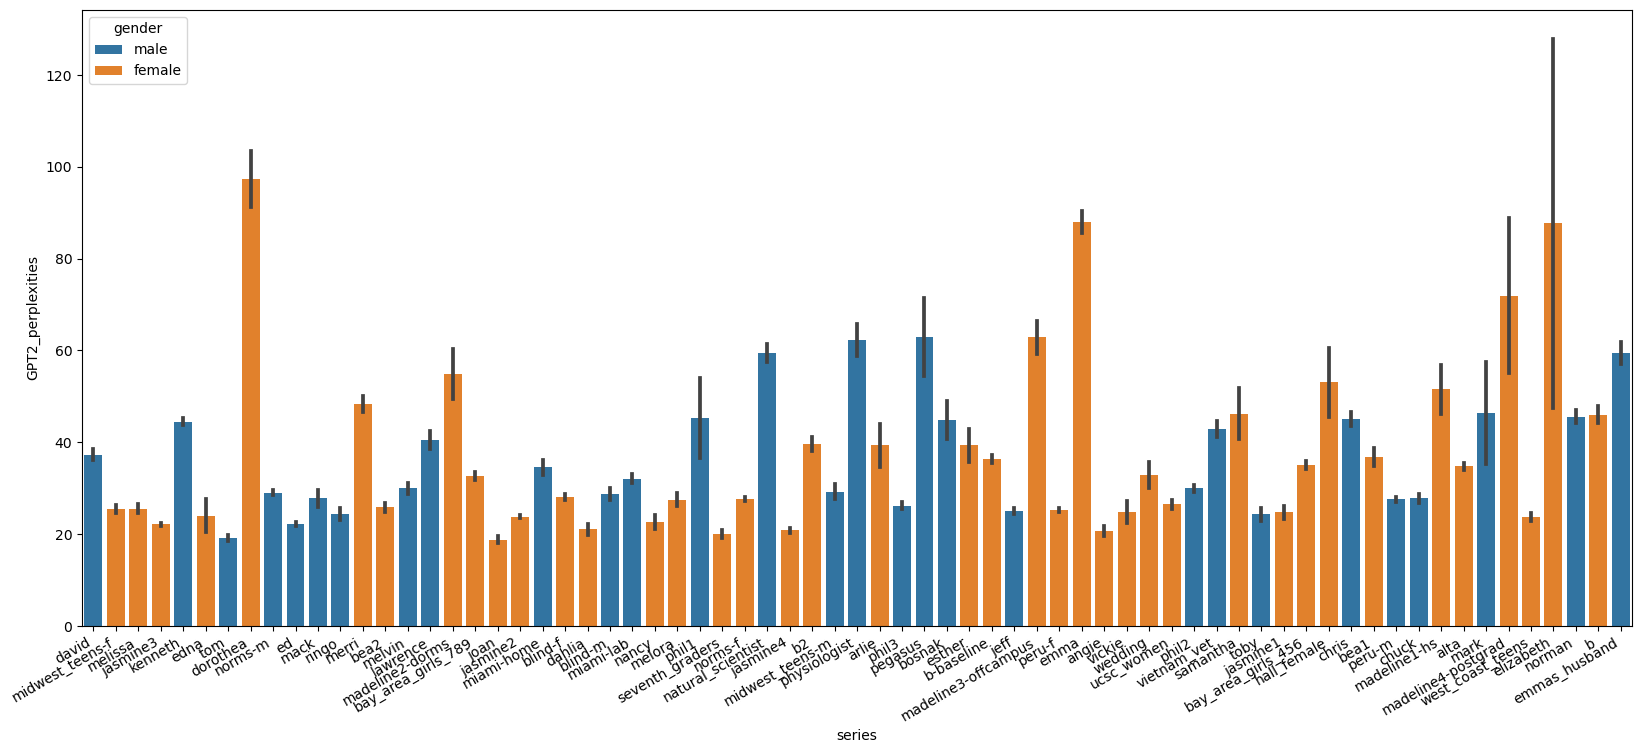

In [6]:
plt.figure(figsize=(20,8))
g = sns.barplot(
    data=dataset_df_test,
    y="GPT2_perplexities",
    x="series",
    hue="gender",
    errorbar=("se", 1),
    dodge=False,
)
g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment='right')
print()

Looking closer, it seems that different series seem to have quite the impact on how "unusual" reports seem to the selected model (i.e., `GPT 2`), and that female seems to write more "unusual" reports. 

Next, we will control if there is a clear relation between the number of words and the reported perplexity!

In [7]:
fig = px.scatter(
    dataset_df_test, 
    y="GPT2_perplexities",
    x="No.Words",
    color="series",
)
fig.show()

In [8]:
stats.spearmanr(
    dataset_df_test["GPT2_perplexities"], 
    dataset_df_test["No.Words"]
)

SpearmanrResult(correlation=-0.4520691845428805, pvalue=0.0)

In [9]:
data_of_interest = dataset_df_test[dataset_df_test["GPT2_perplexities"] <= 200]
data_of_interest = data_of_interest[data_of_interest["No.Words"] >= 20]
stats.spearmanr(
    data_of_interest["GPT2_perplexities"], 
    data_of_interest["No.Words"]
)

SpearmanrResult(correlation=-0.396944589727396, pvalue=0.0)

In [10]:
pptx_nwrd_corr = []
for i in tqdm(range(0, max(dataset_df_test["No.Words"]), 10)):
    for j in range(0, 200, 2):
        data_of_interest = dataset_df_test[dataset_df_test["GPT2_perplexities"] <= j]
        data_of_interest = data_of_interest[data_of_interest["No.Words"] >= i]
        r, p_v = stats.spearmanr(
            data_of_interest["GPT2_perplexities"], 
            data_of_interest["No.Words"]
        )
        pptx_nwrd_corr.append([i, j, r])

100%|███████████████████████████████████████████| 70/70 [00:14<00:00,  4.86it/s]


In [11]:
pptx_nwrd_corr_df = pd.DataFrame(
    pptx_nwrd_corr, 
    columns=["No.Words", "GPT2_perplexities", "\u03C1"]
)

In [12]:
fig = px.scatter_3d(
    pptx_nwrd_corr_df[pptx_nwrd_corr_df["GPT2_perplexities"] <= 100], 
    x="No.Words", 
    y="GPT2_perplexities", 
    z="\u03C1",
)
fig.update_traces(marker_size = 1.5)
fig.show()

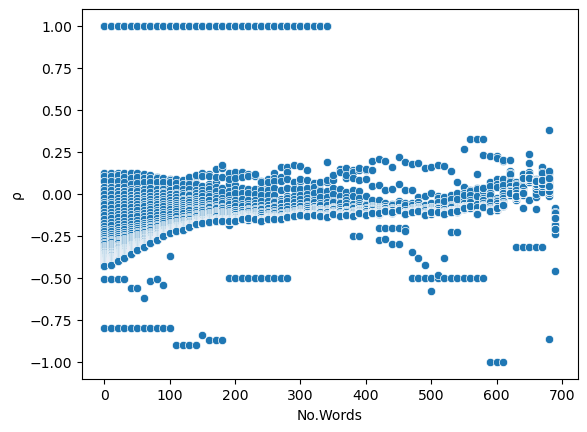

In [13]:
g = sns.scatterplot(
    pptx_nwrd_corr_df, 
    x="No.Words",
    y="\u03C1",
)

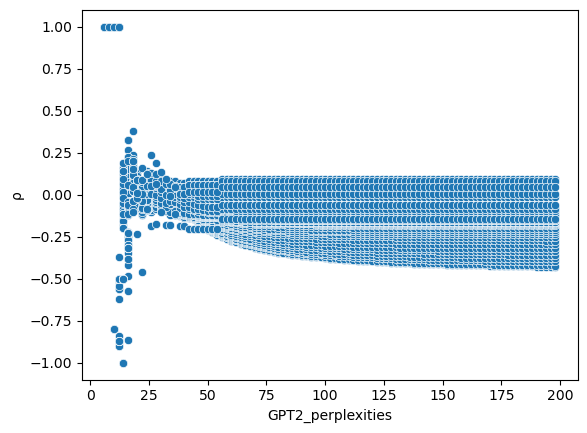

In [14]:
g = sns.scatterplot(
    pptx_nwrd_corr_df, 
    x="GPT2_perplexities",
    y="\u03C1",
)

The landscape of negative correlation suggests that in reality the effect might be influenced by really short reports. In other words, the shorter the reported dream, the more the text appears peculiar to the model.